In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 5.2 MB/s 
     |████████████████████████████████| 209 kB 50.1 MB/s 
     |████████████████████████████████| 81 kB 8.2 MB/s 
     |████████████████████████████████| 78 kB 6.5 MB/s 
     |████████████████████████████████| 49 kB 5.7 MB/s 
     |████████████████████████████████| 112 kB 49.3 MB/s 
     |████████████████████████████████| 146 kB 53.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=c4e4f4b48ace1fd871f837cc524a225d3e344dbb76d5eacb6ea993843b550aa1
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [ ]:
# 데이터분석 4종 세트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 모델들, 성능 평가
# (저는 일반적으로 정형데이터로 머신러닝 분석할 때는 이 2개 모델은 그냥 돌려봅니다. 특히 RF가 테스트하기 좋습니다.)
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from lightgbm.sklearn import LGBMClassifier
from lightgbm.sklearn import LGBMRegressor

# 상관관계 분석, VIF : 다중공선성 제거
from statsmodels.stats.outliers_influence import variance_inflation_factor

# KFold(CV), partial : optuna를 사용하기 위함
from sklearn.model_selection import KFold
from functools import partial

import optuna

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path='/content/drive/MyDrive/minipjt34/'

In [ ]:
# 데이터를 불러옵니다.
train =pd.read_csv(base_path + 'train_V2.csv')
test = pd.read_csv(base_path + 'test_V2.csv')
submission = pd.read_csv(base_path + 'sample_submission_V2.csv')

In [ ]:
feature_reducing = "feature_importance"

In [ ]:
temp1=train.copy()

In [ ]:
#데이터크기축소
temp1 = temp1.sample(frac=0.15, random_state=42, replace=False)

In [ ]:
len(temp1)

667045

In [ ]:
def seek_bug_group_min(temp, match, min_num):

    group_i = temp.loc[temp.matchType == match,:]

    min_i = group_i[group_i['numGroups']<min_num]

    return min_i


def seek_bug_group_max(temp, match, max_num):

    group_i = temp.loc[temp.matchType == match,:]

    max_i = group_i[group_i['numGroups']>max_num]

    return max_i

# squad min bug
squad_min_bug = seek_bug_group_min(temp1, 'squad', 25)
squad_fpp_min_bug = seek_bug_group_min(temp1, 'squad-fpp', 25)
normal_squad_fpp_min_bug = seek_bug_group_min(temp1, 'normal-squad-fpp', 25)
normal_squad_min_bug = seek_bug_group_min(temp1, 'normal-squad', 25)

# duo min bug
duo_min_bug = seek_bug_group_min(temp1, 'duo', 44)
duo_fpp_min_bug = seek_bug_group_min(temp1, 'duo-fpp', 44)
normal_duo_fpp_min_bug = seek_bug_group_min(temp1, 'normal-duo-fpp', 44)
normal_duo_min_bug = seek_bug_group_min(temp1, 'normal-duo', 44)


# solo min bug
solo_fpp_min_bug = seek_bug_group_min(temp1, 'solo-fpp', 85)
solo_min_bug = seek_bug_group_min(temp1, 'solo', 85)
normal_solo_fpp_min_bug = seek_bug_group_min(temp1, 'normal-solo-fpp', 85)
normal_solo_min_bug = seek_bug_group_min(temp1, 'normal-solo', 85)

# squad max bug
squad_max_bug = seek_bug_group_max(temp1, 'squad', 32)
squad_fpp_max_bug = seek_bug_group_max(temp1, 'squad-fpp', 32)
normal_squad_fpp_max_bug = seek_bug_group_max(temp1, 'normal-squad-fpp', 32)
normal_squad_max_bug = seek_bug_group_max(temp1, 'normal-squad', 32)

# duo max bug
duo_max_bug= seek_bug_group_max(temp1, 'duo', 50)
duo_fpp_max_bug = seek_bug_group_max(temp1, 'duo-fpp', 50)
normal_duo_fpp_max_bug = seek_bug_group_max(temp1, 'normal-duo-fpp', 50)
normal_duo_max_bug = seek_bug_group_max(temp1, 'normal-duo', 50)

# solo max bug
solo_max_bug = seek_bug_group_max(temp1, 'solo', 100)
solo_fpp_max_bug = seek_bug_group_max(temp1, 'solo-fpp', 100)
normal_solo_fpp_max_bug = seek_bug_group_max(temp1, 'normal-solo-fpp', 100)
normal_solo_max_bug = seek_bug_group_max(temp1, 'normal-solo', 100)
# squad min bug
print(squad_min_bug,
'================================',
squad_fpp_min_bug,
'================================',
normal_squad_fpp_min_bug,
'================================',
normal_squad_min_bug, 
'================================',sep='\n')

# duo min bug
print(duo_min_bug,
'================================',
duo_fpp_min_bug,
'================================',
normal_duo_fpp_min_bug,
'================================',
normal_duo_min_bug,
'================================',sep='\n')


# solo min bug
print(solo_fpp_min_bug,
'================================',
solo_min_bug,
'================================',
normal_solo_fpp_min_bug,
'================================',
normal_solo_min_bug, 
'================================',sep='\n')

# squad max bug
print(squad_max_bug,
'================================',
squad_fpp_max_bug,
'================================',
normal_squad_fpp_max_bug,
'================================',
normal_squad_max_bug, 
'================================',sep='\n')

# duo max bug
print(duo_max_bug,
'================================',
duo_fpp_max_bug,
'================================',
normal_duo_fpp_max_bug,
'================================',
normal_duo_max_bug, 
'================================',sep='\n')

# solo max bug
print(solo_max_bug,
'================================',
solo_fpp_max_bug,
'================================',
normal_solo_fpp_max_bug,
'================================',
normal_solo_max_bug, 
'================================',sep='\n')

                     Id         groupId         matchId  assists  boosts  \
2555773  36d45a7e95b913  916c4c31723cdb  7b572f22974581        0       0   
1543844  8e7f2a3768cab0  abcec154c3e827  c30c0c9395c1cf        0       0   
2558403  f5dfe3129e22b7  d57d36822cf5b4  be37d658d8f1c8        0       0   
2187261  e8abdaf1980a3d  4174ad99cc6ac0  6e52d6cedd73f2        0       0   
3728210  f8e1d7d9b1bf5c  bbd8ca74d86239  b74a3d26827f94        0       1   
...                 ...             ...             ...      ...     ...   
3140639  f5ab58ee616af2  f744d17ed97392  8f1383349bdaf4        0       0   
1644454  6ca38adfc89499  0b27cffb0254fe  456e7a5ff9e512        1       8   
2754497  21bd334f32b4ef  d9b6cbef3a64eb  9120d43875daea        0       0   
668593   de3b4b4b8801b2  d2195a11aa2541  1fa18d5378b3b6        1       0   
1706797  f0c3f2424d01ad  80543da077d9ef  050f72dc2fdb24        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
2555773  

In [ ]:
temp_1_min = pd.concat([squad_min_bug, squad_fpp_min_bug, normal_squad_fpp_min_bug, normal_squad_min_bug,
                    duo_min_bug, duo_fpp_min_bug, normal_duo_fpp_min_bug, normal_duo_min_bug, 
                    solo_fpp_min_bug, solo_min_bug, normal_solo_fpp_min_bug, normal_solo_min_bug], axis=0)
temp1_max = pd.concat([squad_max_bug, squad_fpp_max_bug, normal_squad_fpp_max_bug, normal_squad_max_bug,
                      duo_max_bug, duo_fpp_max_bug, normal_duo_fpp_max_bug, normal_duo_max_bug, 
                      solo_max_bug, solo_fpp_max_bug, normal_solo_fpp_max_bug, normal_solo_max_bug], axis=0)
temp_bug = pd.concat([temp1_max, temp_1_min], axis=0)
temp2=temp1.drop(temp_bug.index, axis=0)

In [ ]:
#결측치 제거 데이터 전과 후
print(temp1.shape , temp2.shape)

(667045, 29) (607440, 29)


In [ ]:
# 이벤트 제거
temp2 = temp2.drop(temp2[temp2.matchType.str.contains("flare")].index, axis=0)
temp2 = temp2.drop(temp2[temp2.matchType.str.contains("crash")].index, axis=0)
temp2

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4289863,ab772932dc284b,6f0931849c42fc,7558d7990b8795,0,0,161.3,3,2,0,7,...,1,0.0,0,0.0,0,0,565.3,2,1660,0.3929
1660760,eae2ba6cc7de4c,a8ddca0c7e8f74,0cf8e1dc70559e,0,2,100.0,0,0,1,24,...,0,450.7,0,0.0,0,0,1607.0,6,1593,0.7083
363725,aa5867db86503b,76d57fc80f70f2,fc69844a437eae,3,2,289.9,2,0,9,14,...,1,3950.0,0,0.0,0,0,2131.0,5,0,0.8148
1073463,9ec6c0ee672370,78935f8da2a64d,8a6b99c6d832f1,1,0,179.5,1,0,0,69,...,1,0.0,0,0.0,0,0,837.6,4,0,0.3333
414963,59f1f08405cf55,45bd8c2766b800,d39627df3d2674,0,0,114.8,0,0,0,71,...,0,0.0,0,0.0,0,0,187.4,2,1526,0.3214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2381585,5b4159c4065c3e,8f1920af94375d,44366e01c3cece,0,2,0.0,0,0,6,56,...,0,972.3,0,0.0,0,0,1145.0,2,0,0.6000
3010658,f402fa09f3f959,825c60ecc6bf1b,ef048c066bf2f5,0,0,416.0,3,0,0,8,...,0,0.0,0,0.0,0,0,2717.0,6,1483,0.9200
298060,51628215e297ac,93a24c14ae4457,61a07c655772b3,0,0,111.4,1,0,4,45,...,0,5139.0,0,0.0,0,0,3211.0,5,1565,0.7407
3190576,e60f2d43169e35,615e603e029639,7ad802e3c51d18,0,1,0.0,0,0,5,54,...,0,1940.0,0,0.0,1,1,2136.0,5,0,0.4800


In [ ]:
temp1=temp2.copy()

In [ ]:
temp2 = temp1.iloc[:,3:]
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(temp2['matchType'])
encoder.fit(test["matchType"])
temp2['matchType'] = encoder.transform(temp2['matchType'])
test['matchType'] = encoder.transform(test['matchType'])

In [ ]:
trainX = temp2.drop(['winPlacePerc','killPlace'], axis=1)
testX = test.drop(columns='killPlace').iloc[:,3:]
y = temp2.winPlacePerc
print(trainX.shape, testX.shape, y.shape)

(605937, 24) (1934174, 24) (605937,)


In [ ]:
# 1. correlation

# 중복정보가 있는 column 제거하기 위해 상관계수를 확인해봅니다.
def remove_collinearity(X, threshold):
    """
    X : feature matrix
    threshold : 다중공선성을 제거할 column을 고르는 기준 값. [0, 1]
    """
    
    corr = X.corr()
    candidate_cols = []
    
    for x in corr.iterrows():
        idx, row = x[0], x[1] # decoupling tuple
        # 해당 row는 이미 처리가 되어서 볼 필요가 없다.
        if idx in candidate_cols:
            continue
        #print(row[row > 0.7].index[1:])
        candidates = row[row > threshold].index[1:]

        # 자기 자신을 제외하고 threshold를 넘는 column이 있다면,
        if len(candidates) != 0:
            for col in candidates:
                candidate_cols.append(col)           
    
    return candidate_cols

def find_feature_importance(X, model, show_plot):

    feat_names = X.columns.values
    importances = model.feature_importances_
    std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
    indices = np.argsort(importances)[::-1][:20]

    plt.figure(figsize=(12,12))
    plt.title("Feature importances")
    plt.bar(range(len(indices)), importances[indices], color="r", align="center")
    plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
    plt.xlim([-1, len(indices)])
    plt.show()
    
    important_features = X.columns[importances >= 0.005]
    return important_features
    
def apply_PCA(X, show_plot):
    from sklearn.decomposition import PCA
    # training data와 test data를 모두 PCA를 이용하여 차원 감소를 수행합니다.
    pca = PCA(n_components=0.90) # 원래 데이터의 90%를 보존하는 차원.
    pca_090 = pca.fit(X) # 학습 및 변환
    reduced_X = pca_090.transform(X)
    print(reduced_X.shape)
    
    if show_plot:
        labels = [f"PC{x}" for x in range(1, reduced_X.shape[1]+1)]
        pca_090_variance = np.round(pca_090.explained_variance_ratio_.cumsum()*100, decimals=1)
        plt.figure(figsize=(25,5))
        plt.bar(x=range(1, len(pca_090_variance)+1), height=pca_090_variance, tick_label=labels)

        plt.xticks(rotation=90, color='indigo', size=15)
        plt.yticks(rotation=0, color='indigo', size=15)
        plt.title('Scree Plot',color='tab:orange', fontsize=25)
        plt.xlabel('Principal Components', {'color': 'tab:orange', 'fontsize':15})
        plt.ylabel('Cumulative percentage of explained variance ', {'color': 'tab:orange', 'fontsize':15})
        plt.show()
        
        X_train_pca_df = pd.DataFrame(reduced_X, columns=labels)
        display(X_train_pca_df)

    return pca_090, X_train_pca_df

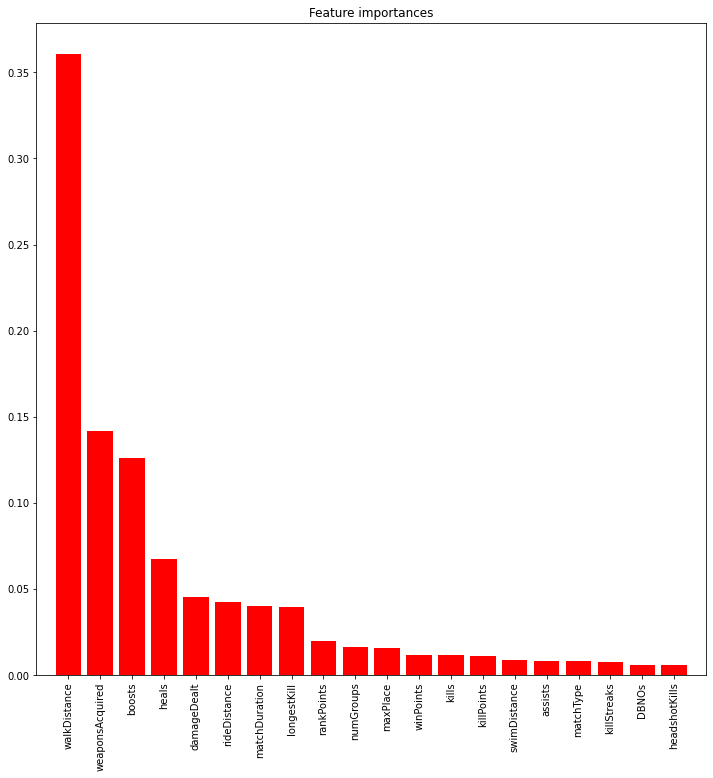

(605937, 20)


In [ ]:
# PCA 적용
if feature_reducing == "correlation":
    threshold = 0.7
    correlated_features = remove_collinearity(trainX, threshold)
    correlated_features = set(correlated_features) # 중복 제거
    print("%d Correlation features over %.2f" % (len(correlated_features), threshold))
    
    X = trainX.drop(columns=correlated_features)
    print(X.shape)
    
elif feature_reducing == "feature_importance":
    show_plot = True
    model = RandomForestRegressor(max_features="sqrt", n_jobs=-1, random_state=0xC0FFEE)
    model.fit(trainX, y)
    important_features = find_feature_importance(trainX, model, show_plot)
    X = trainX[important_features]
    print(X.shape)
    
elif feature_reducing == "PCA":
    show_plot = True
    pca_model, X = apply_PCA(trainX, show_plot)
    print(X.shape)

In [ ]:
#이작업이 필요없나?
# trainX=trainX[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
#        'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
#        'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance',
#        'swimDistance', 'walkDistance', 'weaponsAcquired', 'winPoints']]
# testX=testX[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
#        'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
#        'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance',
#        'swimDistance', 'walkDistance', 'weaponsAcquired', 'winPoints']]

In [ ]:
print(trainX.shape, testX.shape, y.shape)

(605937, 24) (1934174, 24) (605937,)


In [ ]:
### 4. 학습 데이터 분할

In [ ]:
# 첫번째 테스트용으로 사용하고, 실제 학습시에는 K-Fold CV를 사용합니다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(484749, 20) (121188, 20) (484749,) (121188,)


In [ ]:
### 5. 학습 및 평가 (debugging 용도)

In [ ]:
print("\nFitting Random Forest...")
model = RandomForestRegressor(max_features='sqrt', n_jobs=-1)
model.fit(X_train, y_train)


Fitting Random Forest...


RandomForestRegressor(max_features='sqrt', n_jobs=-1)

In [ ]:
from lightgbm.sklearn import LGBMRegressor
print("\nFitting LGBM...")
model = LGBMRegressor()
model.fit(X_train, y_train)


Fitting LGBM...


LGBMRegressor()

In [ ]:
# metric은 그때마다 맞게 바꿔줘야 합니다.
from sklearn.metrics import mean_absolute_error
evaluation_metric = mean_absolute_error

In [ ]:
print("Prediction")
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


train_score = evaluation_metric(y_train, pred_train)
test_score = evaluation_metric(y_test, pred_test)

print("Train Score : %.4f" % train_score)
print("Test Score : %.4f" % test_score)

Prediction
Train Score : 0.0891
Test Score : 0.0893


In [ ]:
### 6. Hyper-parameter Tuning
#- optuna를 갈아넣습니다!

In [ ]:
# For Regression

def optimizer(trial, X, y, K):
    # 조절할 hyper-parameter 조합을 적어줍니다.
    n_estimators = trial.suggest_int("n_estimators", 50, 200)
    max_depth = trial.suggest_int("max_depth", 8, 30)
    max_features = trial.suggest_categorical("max_features", ['auto', 'sqrt', 'log2'])
    
    
    # 원하는 모델을 지정합니다, optuna는 시간이 오래걸리기 때문에 저는 보통 RF로 일단 테스트를 해본 뒤에 LGBM을 사용합니다.
    model = RandomForestRegressor(n_estimators=n_estimators,
                                  max_depth=max_depth,
                                  max_features=max_features,
                                  n_jobs=-1,
                                  random_state=0xC0FFEE)
    
    
    # K-Fold Cross validation을 구현합니다.
    folds = KFold(n_splits=K)
    scores = []
    
    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]
        
        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]
        
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        score = evaluation_metric(y_val, preds)
        scores.append(score)
    
    
    # K-Fold의 평균 loss값을 돌려줍니다.
    return np.mean(scores)

In [ ]:
K = 5 # Kfold 수
opt_func = partial(optimizer, X=X_train, y=y_train, K=K)

rf_study = optuna.create_study(study_name="RF", direction="maximize") # regression task에서 R^2를 최대화!
rf_study.optimize(opt_func, n_trials=13)

[I 2022-06-10 13:31:34,134] A new study created in memory with name: RF
[I 2022-06-10 13:42:52,093] Trial 0 finished with value: 0.09174614182930212 and parameters: {'n_estimators': 149, 'max_depth': 29, 'max_features': 'log2'}. Best is trial 0 with value: 0.09174614182930212.
[I 2022-06-10 14:26:06,721] Trial 1 finished with value: 0.09138809203846195 and parameters: {'n_estimators': 171, 'max_depth': 21, 'max_features': 'auto'}. Best is trial 0 with value: 0.09174614182930212.
[I 2022-06-10 14:36:55,906] Trial 2 finished with value: 0.0910533035194486 and parameters: {'n_estimators': 66, 'max_depth': 12, 'max_features': 'auto'}. Best is trial 0 with value: 0.09174614182930212.
[I 2022-06-10 14:55:22,390] Trial 3 finished with value: 0.09165253606840279 and parameters: {'n_estimators': 74, 'max_depth': 21, 'max_features': 'auto'}. Best is trial 0 with value: 0.09174614182930212.
[I 2022-06-10 14:59:36,742] Trial 4 finished with value: 0.09421475103499893 and parameters: {'n_estimators

In [ ]:
# optuna가 시도했던 모든 실험 관련 데이터
rf_study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_max_depth,params_max_features,params_n_estimators,state
0,0,0.091746,2022-06-10 13:31:34.140980,2022-06-10 13:42:52.093424,0 days 00:11:17.952444,29,log2,149,COMPLETE
1,1,0.091388,2022-06-10 13:42:52.099455,2022-06-10 14:26:06.721393,0 days 00:43:14.621938,21,auto,171,COMPLETE
2,2,0.091053,2022-06-10 14:26:06.726531,2022-06-10 14:36:55.906506,0 days 00:10:49.179975,12,auto,66,COMPLETE
3,3,0.091653,2022-06-10 14:36:55.910255,2022-06-10 14:55:22.390079,0 days 00:18:26.479824,21,auto,74,COMPLETE
4,4,0.094215,2022-06-10 14:55:22.392700,2022-06-10 14:59:36.741835,0 days 00:04:14.349135,13,sqrt,102,COMPLETE
5,5,0.092540,2022-06-10 14:59:36.744586,2022-06-10 15:28:59.247539,0 days 00:29:22.502953,29,auto,105,COMPLETE
6,6,0.091737,2022-06-10 15:28:59.254137,2022-06-10 15:33:21.188273,0 days 00:04:21.934136,22,log2,67,COMPLETE
7,7,0.100989,2022-06-10 15:33:21.191581,2022-06-10 15:36:26.463577,0 days 00:03:05.271996,9,log2,103,COMPLETE
8,8,0.090773,2022-06-10 15:36:26.471545,2022-06-10 16:08:57.659981,0 days 00:32:31.188436,13,auto,190,COMPLETE
9,9,0.091425,2022-06-10 16:08:57.663512,2022-06-10 16:20:12.552007,0 days 00:11:14.888495,20,log2,186,COMPLETE


In [ ]:
print("Best Score: %.4f" % rf_study.best_value) # best score 출력
print("Best params: ", rf_study.best_trial.params) # best score일 때의 하이퍼파라미터들

Best Score: 0.1044
Best params:  {'n_estimators': 135, 'max_depth': 8, 'max_features': 'sqrt'}


In [ ]:
# 실험 기록 시각화
optuna.visualization.plot_optimization_history(rf_study)

In [ ]:
# hyper-parameter들의 중요도
optuna.visualization.plot_param_importances(rf_study)

In [ ]:
### 7. 테스트 및 제출 파일 생성

In [ ]:
final_rf_model = RandomForestRegressor(n_estimators=rf_study.best_trial.params["n_estimators"],
                                 max_depth=rf_study.best_trial.params["max_depth"],
                                 max_features=rf_study.best_trial.params["max_features"])

final_rf_model.fit(X, y) # finalize model

RandomForestRegressor(max_depth=8, max_features='sqrt', n_estimators=135)

In [ ]:
testX

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPoints,kills,killStreaks,longestKill,...,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints
0,0,0,51.46,0,0,0,0,0,0,0.00,...,1500,0,0.0,0,0.000,0,0,588.00,1,0
1,0,4,179.10,0,0,2,0,2,1,361.90,...,1503,2,4669.0,0,0.000,0,0,2017.00,6,0
2,1,0,23.40,0,0,4,0,0,0,0.00,...,1565,0,0.0,0,0.000,0,0,787.80,4,0
3,0,0,65.52,0,0,0,0,0,0,0.00,...,1465,0,0.0,0,0.000,0,0,1812.00,3,0
4,0,4,330.20,1,2,1,0,3,1,60.06,...,1480,1,0.0,0,0.000,0,0,2963.00,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1934169,1,2,381.00,3,0,7,1294,4,2,69.27,...,-1,1,0.0,0,0.000,0,0,1799.00,5,1526
1934170,0,0,0.00,0,0,0,1449,0,0,0.00,...,-1,0,0.0,0,0.000,0,0,1195.00,3,1496
1934171,0,0,91.96,0,0,3,0,1,1,25.38,...,1482,0,0.0,0,7.798,1,0,3327.00,3,0
1934172,1,2,138.60,0,0,12,0,1,1,67.89,...,1456,1,0.0,0,0.000,0,0,1893.00,4,0


In [ ]:
# PCA 적용
if feature_reducing == "correlation":
    test = testX.drop(columns=correlated_features)
    print(X.shape)
    
elif feature_reducing == "feature_importance":
    test = testX[important_features]
    print(X.shape)
    
elif feature_reducing == "PCA":
    test = pca_model.transform(testX)
    print(X.shape)

(577051, 20)


In [ ]:
prediction = final_rf_model.predict(test)
prediction

array([0.24519726, 0.83584232, 0.38709856, ..., 0.72371853, 0.78561637,
       0.12688764])

In [ ]:
submission

,Id,winPlacePerc
0,9329eb41e215eb,1
1,639bd0dcd7bda8,1
2,63d5c8ef8dfe91,1
3,cf5b81422591d1,1
4,ee6a295187ba21,1
...,...,...
1934169,a316c3a13887d5,1
1934170,5312146b27d875,1
1934171,fc8818b5b32ad3,1
1934172,a0f91e35f8458f,1


In [ ]:
submission["winPlacePerc"] = prediction
submission

,Id,winPlacePerc
0,9329eb41e215eb,0.245197
1,639bd0dcd7bda8,0.835842
2,63d5c8ef8dfe91,0.387099
3,cf5b81422591d1,0.558789
4,ee6a295187ba21,0.864687
...,...,...
1934169,a316c3a13887d5,0.767066
1934170,5312146b27d875,0.510267
1934171,fc8818b5b32ad3,0.723719
1934172,a0f91e35f8458f,0.785616


In [ ]:
submission.reset_index(drop=True).to_csv(base_path + f"rf_submission_{feature_reducing}.csv", index=False)

In [ ]:
submission.to_csv(base_path+'baseline.csv', index=False)

In [ ]:
# save traind model by pickle
import pickle
with open('PUBG_randomforest_model.pickle', 'wb') as fw:
    pickle.dump(model, fw)

In [ ]:
import pickle 
with open('PUBG_randomforest_model.pickle','rb') as file:
    model = pickle.load(file)

In [ ]:
### 9. LightGBM으로 변경!

In [ ]:
# For Regression

def optimizer(trial, X, y, K):
    
    import os
    
    param = {
        'objective': 'regression', # 회귀
        'verbose': 0,
        'max_depth': trial.suggest_int('max_depth', 8, 20),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1)
        #"device" : 'gpu'
    }

    model = LGBMRegressor(**param, n_jobs=os.cpu_count())
    
    # K-Fold Cross validation을 구현합니다.
    folds = KFold(n_splits=K)
    scores = []
    
    for train_idx, val_idx in folds.split(X, y):
        X_train = X.iloc[train_idx, :]
        y_train = y.iloc[train_idx]
        
        X_val = X.iloc[val_idx, :]
        y_val = y.iloc[val_idx]
        
        model.fit(X_train, y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=25)
        preds = model.predict(X_val)
        score = evaluation_metric(y_val, preds)
        scores.append(score)
    
    
    # K-Fold의 평균 loss값을 돌려줍니다.
    return np.mean(scores)

In [ ]:
K = 5 # Kfold 수
opt_func = partial(optimizer, X=X_train, y=y_train, K=K)

lgbm_study = optuna.create_study(study_name="LGBM", direction="minimize") # regression task에서 R^2를 최대화! #mae로 할경우 minimize로 해야한다. 오류가 최소화되는값
lgbm_study.optimize(opt_func, n_trials=13)

[I 2022-06-13 08:04:02,053] A new study created in memory with name: LGBM


[1]	valid_0's l2: 0.0932239
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.0932217
[3]	valid_0's l2: 0.0932195
[4]	valid_0's l2: 0.0932172
[5]	valid_0's l2: 0.093215
[6]	valid_0's l2: 0.0932128
[7]	valid_0's l2: 0.0932106
[8]	valid_0's l2: 0.0932084
[9]	valid_0's l2: 0.0932062
[10]	valid_0's l2: 0.093204
[11]	valid_0's l2: 0.0932018
[12]	valid_0's l2: 0.0931996
[13]	valid_0's l2: 0.0931974
[14]	valid_0's l2: 0.0931952
[15]	valid_0's l2: 0.093193
[16]	valid_0's l2: 0.0931908
[17]	valid_0's l2: 0.0931886
[18]	valid_0's l2: 0.0931863
[19]	valid_0's l2: 0.0931841
[20]	valid_0's l2: 0.0931819
[21]	valid_0's l2: 0.0931797
[22]	valid_0's l2: 0.0931775
[23]	valid_0's l2: 0.0931753
[24]	valid_0's l2: 0.0931731
[25]	valid_0's l2: 0.0931709
[26]	valid_0's l2: 0.0931687
[27]	valid_0's l2: 0.0931665
[28]	valid_0's l2: 0.0931643
[29]	valid_0's l2: 0.0931621
[30]	valid_0's l2: 0.0931599
[31]	valid_0's l2: 0.0931577
[32]	valid_0's l2: 0.0931555
[33]	valid_0's l2: 0.0

[I 2022-06-13 08:06:38,637] Trial 0 finished with value: 0.26548952466678155 and parameters: {'max_depth': 18, 'learning_rate': 1.49180811679453e-05, 'n_estimators': 357, 'min_child_samples': 71, 'subsample': 0.9959691896281699}. Best is trial 0 with value: 0.26548952466678155.


[1]	valid_0's l2: 0.0931909
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.0931557
[3]	valid_0's l2: 0.0931205
[4]	valid_0's l2: 0.0930853
[5]	valid_0's l2: 0.0930502
[6]	valid_0's l2: 0.093015
[7]	valid_0's l2: 0.0929799
[8]	valid_0's l2: 0.0929448
[9]	valid_0's l2: 0.0929097
[10]	valid_0's l2: 0.0928746
[11]	valid_0's l2: 0.0928396
[12]	valid_0's l2: 0.0928046
[13]	valid_0's l2: 0.0927695
[14]	valid_0's l2: 0.0927345
[15]	valid_0's l2: 0.0926996
[16]	valid_0's l2: 0.0926646
[17]	valid_0's l2: 0.0926296
[18]	valid_0's l2: 0.0925947
[19]	valid_0's l2: 0.0925598
[20]	valid_0's l2: 0.0925249
[21]	valid_0's l2: 0.09249
[22]	valid_0's l2: 0.0924551
[23]	valid_0's l2: 0.0924203
[24]	valid_0's l2: 0.0923855
[25]	valid_0's l2: 0.0923506
[26]	valid_0's l2: 0.0923158
[27]	valid_0's l2: 0.0922811
[28]	valid_0's l2: 0.0922463
[29]	valid_0's l2: 0.0922115
[30]	valid_0's l2: 0.0921768
[31]	valid_0's l2: 0.0921421
[32]	valid_0's l2: 0.0921074
[33]	valid_0's l2: 0.0

[I 2022-06-13 08:08:26,676] Trial 1 finished with value: 0.25228383221477907 and parameters: {'max_depth': 16, 'learning_rate': 0.00023798887760529756, 'n_estimators': 285, 'min_child_samples': 94, 'subsample': 0.41667206592658906}. Best is trial 1 with value: 0.25228383221477907.


[1]	valid_0's l2: 0.093226
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.093226
[3]	valid_0's l2: 0.093226
[4]	valid_0's l2: 0.0932259
[5]	valid_0's l2: 0.0932259
[6]	valid_0's l2: 0.0932258
[7]	valid_0's l2: 0.0932258
[8]	valid_0's l2: 0.0932258
[9]	valid_0's l2: 0.0932257
[10]	valid_0's l2: 0.0932257
[11]	valid_0's l2: 0.0932256
[12]	valid_0's l2: 0.0932256
[13]	valid_0's l2: 0.0932256
[14]	valid_0's l2: 0.0932255
[15]	valid_0's l2: 0.0932255
[16]	valid_0's l2: 0.0932254
[17]	valid_0's l2: 0.0932254
[18]	valid_0's l2: 0.0932253
[19]	valid_0's l2: 0.0932253
[20]	valid_0's l2: 0.0932253
[21]	valid_0's l2: 0.0932252
[22]	valid_0's l2: 0.0932252
[23]	valid_0's l2: 0.0932251
[24]	valid_0's l2: 0.0932251
[25]	valid_0's l2: 0.0932251
[26]	valid_0's l2: 0.093225
[27]	valid_0's l2: 0.093225
[28]	valid_0's l2: 0.0932249
[29]	valid_0's l2: 0.0932249
[30]	valid_0's l2: 0.0932249
[31]	valid_0's l2: 0.0932248
[32]	valid_0's l2: 0.0932248
[33]	valid_0's l2: 0.093

[I 2022-06-13 08:11:08,901] Trial 2 finished with value: 0.26663322800443534 and parameters: {'max_depth': 8, 'learning_rate': 2.732043912766337e-07, 'n_estimators': 435, 'min_child_samples': 29, 'subsample': 0.411998724430138}. Best is trial 1 with value: 0.25228383221477907.


[1]	valid_0's l2: 0.0932261
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.0932261
[3]	valid_0's l2: 0.0932261
[4]	valid_0's l2: 0.0932261
[5]	valid_0's l2: 0.0932261
[6]	valid_0's l2: 0.0932261
[7]	valid_0's l2: 0.0932261
[8]	valid_0's l2: 0.0932261
[9]	valid_0's l2: 0.0932261
[10]	valid_0's l2: 0.0932261
[11]	valid_0's l2: 0.0932261
[12]	valid_0's l2: 0.093226
[13]	valid_0's l2: 0.093226
[14]	valid_0's l2: 0.093226
[15]	valid_0's l2: 0.093226
[16]	valid_0's l2: 0.093226
[17]	valid_0's l2: 0.093226
[18]	valid_0's l2: 0.093226
[19]	valid_0's l2: 0.093226
[20]	valid_0's l2: 0.093226
[21]	valid_0's l2: 0.093226
[22]	valid_0's l2: 0.093226
[23]	valid_0's l2: 0.093226
[24]	valid_0's l2: 0.093226
[25]	valid_0's l2: 0.093226
[26]	valid_0's l2: 0.093226
[27]	valid_0's l2: 0.093226
[28]	valid_0's l2: 0.093226
[29]	valid_0's l2: 0.093226
[30]	valid_0's l2: 0.093226
[31]	valid_0's l2: 0.093226
[32]	valid_0's l2: 0.093226
[33]	valid_0's l2: 0.093226
[34]	valid_0

[I 2022-06-13 08:15:04,742] Trial 3 finished with value: 0.26665734877289965 and parameters: {'max_depth': 15, 'learning_rate': 1.4830794089733548e-08, 'n_estimators': 627, 'min_child_samples': 72, 'subsample': 0.9336988593262178}. Best is trial 1 with value: 0.25228383221477907.


[1]	valid_0's l2: 0.0932161
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.0932061
[3]	valid_0's l2: 0.0931961
[4]	valid_0's l2: 0.0931861
[5]	valid_0's l2: 0.0931761
[6]	valid_0's l2: 0.0931661
[7]	valid_0's l2: 0.0931561
[8]	valid_0's l2: 0.0931461
[9]	valid_0's l2: 0.0931361
[10]	valid_0's l2: 0.0931261
[11]	valid_0's l2: 0.0931161
[12]	valid_0's l2: 0.0931061
[13]	valid_0's l2: 0.0930962
[14]	valid_0's l2: 0.0930862
[15]	valid_0's l2: 0.0930762
[16]	valid_0's l2: 0.0930662
[17]	valid_0's l2: 0.0930562
[18]	valid_0's l2: 0.0930463
[19]	valid_0's l2: 0.0930363
[20]	valid_0's l2: 0.0930263
[21]	valid_0's l2: 0.0930163
[22]	valid_0's l2: 0.0930064
[23]	valid_0's l2: 0.0929964
[24]	valid_0's l2: 0.0929864
[25]	valid_0's l2: 0.0929764
[26]	valid_0's l2: 0.0929665
[27]	valid_0's l2: 0.0929565
[28]	valid_0's l2: 0.0929465
[29]	valid_0's l2: 0.0929366
[30]	valid_0's l2: 0.0929266
[31]	valid_0's l2: 0.0929167
[32]	valid_0's l2: 0.0929067
[33]	valid_0's l2: 

[I 2022-06-13 08:18:31,850] Trial 4 finished with value: 0.25856624596639605 and parameters: {'max_depth': 14, 'learning_rate': 6.75805106779112e-05, 'n_estimators': 555, 'min_child_samples': 71, 'subsample': 0.40638507452716804}. Best is trial 1 with value: 0.25228383221477907.


[1]	valid_0's l2: 0.0923862
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.0915558
[3]	valid_0's l2: 0.090735
[4]	valid_0's l2: 0.0899234
[5]	valid_0's l2: 0.0891211
[6]	valid_0's l2: 0.0883279
[7]	valid_0's l2: 0.0875439
[8]	valid_0's l2: 0.0867684
[9]	valid_0's l2: 0.0860027
[10]	valid_0's l2: 0.0852446
[11]	valid_0's l2: 0.084495
[12]	valid_0's l2: 0.0837543
[13]	valid_0's l2: 0.0830215
[14]	valid_0's l2: 0.0822973
[15]	valid_0's l2: 0.0815807
[16]	valid_0's l2: 0.0808727
[17]	valid_0's l2: 0.0801724
[18]	valid_0's l2: 0.0794806
[19]	valid_0's l2: 0.0787964
[20]	valid_0's l2: 0.0781199
[21]	valid_0's l2: 0.0774507
[22]	valid_0's l2: 0.0767895
[23]	valid_0's l2: 0.076135
[24]	valid_0's l2: 0.0754883
[25]	valid_0's l2: 0.0748484
[26]	valid_0's l2: 0.0742167
[27]	valid_0's l2: 0.0735908
[28]	valid_0's l2: 0.0729732
[29]	valid_0's l2: 0.0723604
[30]	valid_0's l2: 0.0717561
[31]	valid_0's l2: 0.0711576
[32]	valid_0's l2: 0.0705662
[33]	valid_0's l2: 0.0

[I 2022-06-13 08:23:48,684] Trial 5 finished with value: 0.09146804692220156 and parameters: {'max_depth': 15, 'learning_rate': 0.005691183025470452, 'n_estimators': 835, 'min_child_samples': 18, 'subsample': 0.9674217659937323}. Best is trial 5 with value: 0.09146804692220156.


[1]	valid_0's l2: 0.0918151
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.0904313
[3]	valid_0's l2: 0.0890736
[4]	valid_0's l2: 0.0877424
[5]	valid_0's l2: 0.0864361
[6]	valid_0's l2: 0.0851552
[7]	valid_0's l2: 0.0838974
[8]	valid_0's l2: 0.0826643
[9]	valid_0's l2: 0.0814548
[10]	valid_0's l2: 0.0802673
[11]	valid_0's l2: 0.0791032
[12]	valid_0's l2: 0.0779601
[13]	valid_0's l2: 0.0768399
[14]	valid_0's l2: 0.0757391
[15]	valid_0's l2: 0.0746604
[16]	valid_0's l2: 0.073601
[17]	valid_0's l2: 0.0725624
[18]	valid_0's l2: 0.0715438
[19]	valid_0's l2: 0.0705424
[20]	valid_0's l2: 0.0695601
[21]	valid_0's l2: 0.068595
[22]	valid_0's l2: 0.067648
[23]	valid_0's l2: 0.0667205
[24]	valid_0's l2: 0.0658077
[25]	valid_0's l2: 0.0649126
[26]	valid_0's l2: 0.0640346
[27]	valid_0's l2: 0.0631728
[28]	valid_0's l2: 0.0623252
[29]	valid_0's l2: 0.0614947
[30]	valid_0's l2: 0.0606786
[31]	valid_0's l2: 0.0598805
[32]	valid_0's l2: 0.0590945
[33]	valid_0's l2: 0.0

[I 2022-06-13 08:29:22,583] Trial 6 finished with value: 0.08972660055261991 and parameters: {'max_depth': 16, 'learning_rate': 0.009579387233777308, 'n_estimators': 901, 'min_child_samples': 47, 'subsample': 0.7999672935170069}. Best is trial 6 with value: 0.08972660055261991.


[1]	valid_0's l2: 0.0932261
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.0932261
[3]	valid_0's l2: 0.0932261
[4]	valid_0's l2: 0.0932261
[5]	valid_0's l2: 0.0932261
[6]	valid_0's l2: 0.0932261
[7]	valid_0's l2: 0.0932261
[8]	valid_0's l2: 0.0932261
[9]	valid_0's l2: 0.0932261
[10]	valid_0's l2: 0.0932261
[11]	valid_0's l2: 0.0932261
[12]	valid_0's l2: 0.0932261
[13]	valid_0's l2: 0.0932261
[14]	valid_0's l2: 0.0932261
[15]	valid_0's l2: 0.093226
[16]	valid_0's l2: 0.093226
[17]	valid_0's l2: 0.093226
[18]	valid_0's l2: 0.093226
[19]	valid_0's l2: 0.093226
[20]	valid_0's l2: 0.093226
[21]	valid_0's l2: 0.093226
[22]	valid_0's l2: 0.093226
[23]	valid_0's l2: 0.093226
[24]	valid_0's l2: 0.093226
[25]	valid_0's l2: 0.093226
[26]	valid_0's l2: 0.093226
[27]	valid_0's l2: 0.093226
[28]	valid_0's l2: 0.093226
[29]	valid_0's l2: 0.093226
[30]	valid_0's l2: 0.093226
[31]	valid_0's l2: 0.093226
[32]	valid_0's l2: 0.093226
[33]	valid_0's l2: 0.093226
[34]	vali

[I 2022-06-13 08:33:55,381] Trial 7 finished with value: 0.26665748869940237 and parameters: {'max_depth': 18, 'learning_rate': 1.223653040093294e-08, 'n_estimators': 708, 'min_child_samples': 54, 'subsample': 0.6334389252097165}. Best is trial 6 with value: 0.08972660055261991.


[1]	valid_0's l2: 0.0924721
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.0917259
[3]	valid_0's l2: 0.0909874
[4]	valid_0's l2: 0.0902563
[5]	valid_0's l2: 0.0895326
[6]	valid_0's l2: 0.0888165
[7]	valid_0's l2: 0.0881079
[8]	valid_0's l2: 0.0874061
[9]	valid_0's l2: 0.0867118
[10]	valid_0's l2: 0.0860243
[11]	valid_0's l2: 0.0853437
[12]	valid_0's l2: 0.0846701
[13]	valid_0's l2: 0.084003
[14]	valid_0's l2: 0.0833429
[15]	valid_0's l2: 0.0826893
[16]	valid_0's l2: 0.0820427
[17]	valid_0's l2: 0.0814021
[18]	valid_0's l2: 0.0807686
[19]	valid_0's l2: 0.0801414
[20]	valid_0's l2: 0.0795206
[21]	valid_0's l2: 0.078906
[22]	valid_0's l2: 0.0782975
[23]	valid_0's l2: 0.0776949
[24]	valid_0's l2: 0.0770992
[25]	valid_0's l2: 0.0765084
[26]	valid_0's l2: 0.0759244
[27]	valid_0's l2: 0.0753455
[28]	valid_0's l2: 0.0747732
[29]	valid_0's l2: 0.074206
[30]	valid_0's l2: 0.0736451
[31]	valid_0's l2: 0.0730892
[32]	valid_0's l2: 0.072538
[33]	valid_0's l2: 0.07

[I 2022-06-13 08:35:28,777] Trial 8 finished with value: 0.12799502283887726 and parameters: {'max_depth': 9, 'learning_rate': 0.005107209014368104, 'n_estimators': 237, 'min_child_samples': 87, 'subsample': 0.8809056576613447}. Best is trial 6 with value: 0.08972660055261991.


[1]	valid_0's l2: 0.0931996
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.0931732
[3]	valid_0's l2: 0.0931467
[4]	valid_0's l2: 0.0931203
[5]	valid_0's l2: 0.0930939
[6]	valid_0's l2: 0.0930674
[7]	valid_0's l2: 0.093041
[8]	valid_0's l2: 0.0930146
[9]	valid_0's l2: 0.0929883
[10]	valid_0's l2: 0.0929619
[11]	valid_0's l2: 0.0929355
[12]	valid_0's l2: 0.0929092
[13]	valid_0's l2: 0.0928828
[14]	valid_0's l2: 0.0928565
[15]	valid_0's l2: 0.0928301
[16]	valid_0's l2: 0.0928038
[17]	valid_0's l2: 0.0927775
[18]	valid_0's l2: 0.0927512
[19]	valid_0's l2: 0.0927249
[20]	valid_0's l2: 0.0926986
[21]	valid_0's l2: 0.0926724
[22]	valid_0's l2: 0.0926461
[23]	valid_0's l2: 0.0926198
[24]	valid_0's l2: 0.0925936
[25]	valid_0's l2: 0.0925674
[26]	valid_0's l2: 0.0925411
[27]	valid_0's l2: 0.0925149
[28]	valid_0's l2: 0.0924887
[29]	valid_0's l2: 0.0924625
[30]	valid_0's l2: 0.0924363
[31]	valid_0's l2: 0.0924102
[32]	valid_0's l2: 0.092384
[33]	valid_0's l2: 0.

[I 2022-06-13 08:41:04,522] Trial 9 finished with value: 0.2360312895190372 and parameters: {'max_depth': 13, 'learning_rate': 0.0001788116003048176, 'n_estimators': 849, 'min_child_samples': 95, 'subsample': 0.6207512969122504}. Best is trial 6 with value: 0.08972660055261991.


[1]	valid_0's l2: 0.0932259
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.0932258
[3]	valid_0's l2: 0.0932256
[4]	valid_0's l2: 0.0932255
[5]	valid_0's l2: 0.0932253
[6]	valid_0's l2: 0.0932252
[7]	valid_0's l2: 0.093225
[8]	valid_0's l2: 0.0932249
[9]	valid_0's l2: 0.0932247
[10]	valid_0's l2: 0.0932246
[11]	valid_0's l2: 0.0932244
[12]	valid_0's l2: 0.0932243
[13]	valid_0's l2: 0.0932241
[14]	valid_0's l2: 0.093224
[15]	valid_0's l2: 0.0932238
[16]	valid_0's l2: 0.0932237
[17]	valid_0's l2: 0.0932235
[18]	valid_0's l2: 0.0932234
[19]	valid_0's l2: 0.0932232
[20]	valid_0's l2: 0.0932231
[21]	valid_0's l2: 0.0932229
[22]	valid_0's l2: 0.0932228
[23]	valid_0's l2: 0.0932226
[24]	valid_0's l2: 0.0932225
[25]	valid_0's l2: 0.0932223
[26]	valid_0's l2: 0.0932222
[27]	valid_0's l2: 0.093222
[28]	valid_0's l2: 0.0932219
[29]	valid_0's l2: 0.0932217
[30]	valid_0's l2: 0.0932216
[31]	valid_0's l2: 0.0932214
[32]	valid_0's l2: 0.0932213
[33]	valid_0's l2: 0.0

[I 2022-06-13 08:47:36,013] Trial 10 finished with value: 0.2664387405497558 and parameters: {'max_depth': 10, 'learning_rate': 1.0116129117469284e-06, 'n_estimators': 991, 'min_child_samples': 42, 'subsample': 0.7545342215266991}. Best is trial 6 with value: 0.08972660055261991.


[1]	valid_0's l2: 0.091971
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.0907374
[3]	valid_0's l2: 0.0895244
[4]	valid_0's l2: 0.0883328
[5]	valid_0's l2: 0.0871607
[6]	valid_0's l2: 0.086009
[7]	valid_0's l2: 0.0848761
[8]	valid_0's l2: 0.083762
[9]	valid_0's l2: 0.0826676
[10]	valid_0's l2: 0.0815908
[11]	valid_0's l2: 0.0805331
[12]	valid_0's l2: 0.0794923
[13]	valid_0's l2: 0.0784698
[14]	valid_0's l2: 0.0774644
[15]	valid_0's l2: 0.0764758
[16]	valid_0's l2: 0.0755029
[17]	valid_0's l2: 0.0745474
[18]	valid_0's l2: 0.073606
[19]	valid_0's l2: 0.0726824
[20]	valid_0's l2: 0.0717724
[21]	valid_0's l2: 0.0708779
[22]	valid_0's l2: 0.0699992
[23]	valid_0's l2: 0.0691336
[24]	valid_0's l2: 0.0682829
[25]	valid_0's l2: 0.0674449
[26]	valid_0's l2: 0.0666216
[27]	valid_0's l2: 0.0658118
[28]	valid_0's l2: 0.0650156
[29]	valid_0's l2: 0.064233
[30]	valid_0's l2: 0.0634615
[31]	valid_0's l2: 0.0627049
[32]	valid_0's l2: 0.0619606
[33]	valid_0's l2: 0.061

[I 2022-06-13 08:53:58,065] Trial 11 finished with value: 0.0897847802761759 and parameters: {'max_depth': 12, 'learning_rate': 0.008516700783165623, 'n_estimators': 991, 'min_child_samples': 8, 'subsample': 0.772198219536906}. Best is trial 6 with value: 0.08972660055261991.


[1]	valid_0's l2: 0.0930118
Training until validation scores don't improve for 25 rounds.
[2]	valid_0's l2: 0.0927981
[3]	valid_0's l2: 0.092585
[4]	valid_0's l2: 0.0923725
[5]	valid_0's l2: 0.0921607
[6]	valid_0's l2: 0.0919495
[7]	valid_0's l2: 0.0917389
[8]	valid_0's l2: 0.0915289
[9]	valid_0's l2: 0.0913195
[10]	valid_0's l2: 0.0911107
[11]	valid_0's l2: 0.0909026
[12]	valid_0's l2: 0.090695
[13]	valid_0's l2: 0.090488
[14]	valid_0's l2: 0.0902817
[15]	valid_0's l2: 0.0900759
[16]	valid_0's l2: 0.0898707
[17]	valid_0's l2: 0.0896662
[18]	valid_0's l2: 0.0894622
[19]	valid_0's l2: 0.0892589
[20]	valid_0's l2: 0.0890561
[21]	valid_0's l2: 0.0888539
[22]	valid_0's l2: 0.0886524
[23]	valid_0's l2: 0.0884513
[24]	valid_0's l2: 0.0882509
[25]	valid_0's l2: 0.0880511
[26]	valid_0's l2: 0.0878518
[27]	valid_0's l2: 0.0876531
[28]	valid_0's l2: 0.087455
[29]	valid_0's l2: 0.0872574
[30]	valid_0's l2: 0.0870604
[31]	valid_0's l2: 0.086864
[32]	valid_0's l2: 0.0866683
[33]	valid_0's l2: 0.086

[I 2022-06-13 09:00:45,923] Trial 12 finished with value: 0.11881189217940544 and parameters: {'max_depth': 12, 'learning_rate': 0.0014491192434926057, 'n_estimators': 994, 'min_child_samples': 12, 'subsample': 0.7303615085610236}. Best is trial 6 with value: 0.08972660055261991.


In [ ]:
# optuna가 시도했던 모든 실험 관련 데이터
lgbm_study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_learning_rate,params_max_depth,params_min_child_samples,params_n_estimators,params_subsample,state
0,0,0.265490,2022-06-13 08:04:02.061691,2022-06-13 08:06:38.636581,0 days 00:02:36.574890,1.491808e-05,18,71,357,0.995969,COMPLETE
1,1,0.252284,2022-06-13 08:06:38.639733,2022-06-13 08:08:26.675618,0 days 00:01:48.035885,2.379889e-04,16,94,285,0.416672,COMPLETE
2,2,0.266633,2022-06-13 08:08:26.682758,2022-06-13 08:11:08.900707,0 days 00:02:42.217949,2.732044e-07,8,29,435,0.411999,COMPLETE
3,3,0.266657,2022-06-13 08:11:08.904548,2022-06-13 08:15:04.742146,0 days 00:03:55.837598,1.483079e-08,15,72,627,0.933699,COMPLETE
4,4,0.258566,2022-06-13 08:15:04.745771,2022-06-13 08:18:31.850060,0 days 00:03:27.104289,6.758051e-05,14,71,555,0.406385,COMPLETE
5,5,0.091468,2022-06-13 08:18:31.853197,2022-06-13 08:23:48.683957,0 days 00:05:16.830760,5.691183e-03,15,18,835,0.967422,COMPLETE
6,6,0.089727,2022-06-13 08:23:48.694631,2022-06-13 08:29:22.582548,0 days 00:05:33.887917,9.579387e-03,16,47,901,0.799967,COMPLETE
7,7,0.266657,2022-06-13 08:29:22.585983,2022-06-13 08:33:55.381334,0 days 00:04:32.795351,1.223653e-08,18,54,708,0.633439,COMPLETE
8,8,0.127995,2022-06-13 08:33:55.385182,2022-06-13 08:35:28.777027,0 days 00:01:33.391845,5.107209e-03,9,87,237,0.880906,COMPLETE
9,9,0.236031,2022-06-13 08:35:28.780233,2022-06-13 08:41:04.522341,0 days 00:05:35.742108,1.788116e-04,13,95,849,0.620751,COMPLETE


In [ ]:
print("Best Score: %.4f" % lgbm_study.best_value) # best score 출력
print("Best params: ", lgbm_study.best_trial.params) # best score일 때의 하이퍼파라미터들

Best Score: 0.0897
Best params:  {'max_depth': 16, 'learning_rate': 0.009579387233777308, 'n_estimators': 901, 'min_child_samples': 47, 'subsample': 0.7999672935170069}


In [ ]:
# 실험 기록 시각화
optuna.visualization.plot_optimization_history(lgbm_study)

In [ ]:
# hyper-parameter들의 중요도
optuna.visualization.plot_param_importances(lgbm_study)

In [ ]:
trial = lgbm_study.best_trial
trial_params = trial.params

final_lgb_model = LGBMRegressor(**trial_params)
final_lgb_model.fit(X, y) # finalize model

LGBMRegressor(learning_rate=0.009579387233777308, max_depth=16,
              min_child_samples=47, n_estimators=901,
              subsample=0.7999672935170069)

In [ ]:
# PCA 적용
if feature_reducing == "correlation":
    test = testX.drop(columns=correlated_features)
    print(X.shape)
    
elif feature_reducing == "feature_importance":
    test = testX[important_features]
    print(X.shape)
    
elif feature_reducing == "PCA":
    test = pca_model.transform(testX)
    print(X.shape)
    
prediction = final_lgb_model.predict(test)
submission["y"] = prediction
display(submission)
submission.reset_index(drop=True).to_csv(f"lgbm_submission_{feature_reducing}.csv", index=False)

(605937, 20)


,Id,winPlacePerc,y
0,9329eb41e215eb,0.240924,0.244563
1,639bd0dcd7bda8,0.878977,0.865182
2,63d5c8ef8dfe91,0.390883,0.398984
3,cf5b81422591d1,0.536728,0.539391
4,ee6a295187ba21,0.895912,0.891872
...,...,...,...
1934169,a316c3a13887d5,0.728025,0.732167
1934170,5312146b27d875,0.512039,0.510841
1934171,fc8818b5b32ad3,0.852011,0.845347
1934172,a0f91e35f8458f,0.806996,0.811398


In [ ]:
testX[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance',
       'swimDistance', 'walkDistance', 'weaponsAcquired', 'winPoints']]

In [ ]:
#제출하기

testX=testX[['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'rideDistance',
       'swimDistance', 'walkDistance', 'weaponsAcquired', 'winPoints']]

pred_test = model.predict(testX)
pred_test

array([0.24092415, 0.87897705, 0.39088279, ..., 0.85201085, 0.80699629,
       0.12264806])

In [ ]:
len(pred_test)

1934174

In [ ]:
len(submission)

1934174

In [ ]:
submission["winPlacePerc"]=pred_test

In [ ]:
display(submission)

,Id,winPlacePerc
0,9329eb41e215eb,0.240924
1,639bd0dcd7bda8,0.878977
2,63d5c8ef8dfe91,0.390883
3,cf5b81422591d1,0.536728
4,ee6a295187ba21,0.895912
...,...,...
1934169,a316c3a13887d5,0.728025
1934170,5312146b27d875,0.512039
1934171,fc8818b5b32ad3,0.852011
1934172,a0f91e35f8458f,0.806996


In [ ]:
submission.reset_index(drop=True).to_csv(base_path + f"rf_submission_lightGBM{feature_reducing}.csv", index=False)